In [1]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Step 2: Load Dataset
df = pd.read_csv('weatherHistory.csv', parse_dates=['Formatted Date'], index_col='Formatted Date')
df = df[['Temperature (C)']]
df.columns = ['temperature']  # rename for consistency
df.dropna(inplace=True)

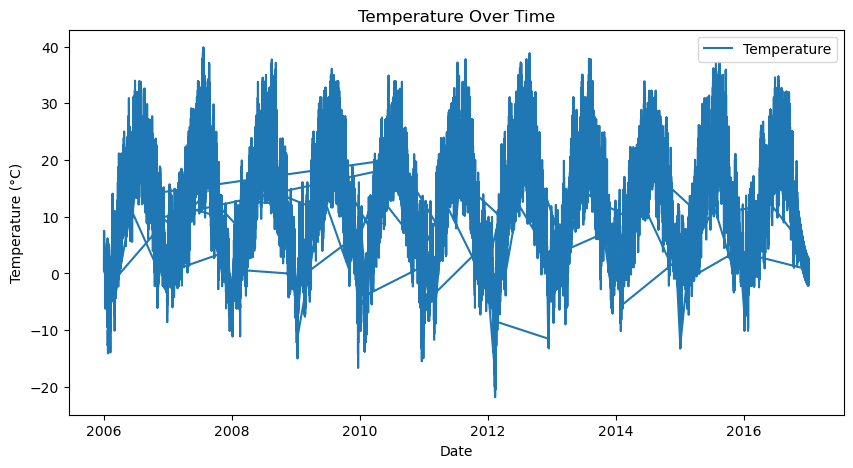

In [3]:
#Step 3: Visualize Data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [4]:
#Step 4: Normalize the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
# Step 5: Create Sequences

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

# Reshape for LSTM: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [6]:
# Step 6: Train-Test Split

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [7]:
# Step 7: Build LSTM Model

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - loss: 0.0050 - val_loss: 4.7654e-04
Epoch 2/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 56s 12ms/step - loss: 6.1243e-04 - val_loss: 3.5992e-04
Epoch 3/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 96s 20ms/step - loss: 5.9928e-04 - val_loss: 5.2442e-04
Epoch 4/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - loss: 6.1586e-04 - val_loss: 3.6338e-04
Epoch 5/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 5.8561e-04 - val_loss: 3.5349e-04
Epoch 6/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 5.8205e-04 - val_loss: 3.6750e-04
Epoch 7/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 5.6908e-04 - val_loss: 3.5768e-04
Epoch 8/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 5.6027e-04 - val_loss: 3.5145e-04
Epoch 9/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 5.6490e-04 - val_loss: 3.5197e-04
Epoch 10/20
4823/4823 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 5.6067e-04 - val_loss: 3.3930e-04
Epoch 11/20
4823/4823 ━━━━━━━

In [8]:
# Step 8: Predictions & Plot

predictions = model.predict(X_test)

# Inverse transform to get actual values
predicted_temp = scaler.inverse_transform(predictions)
actual_temp = scaler.inverse_transform(y_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


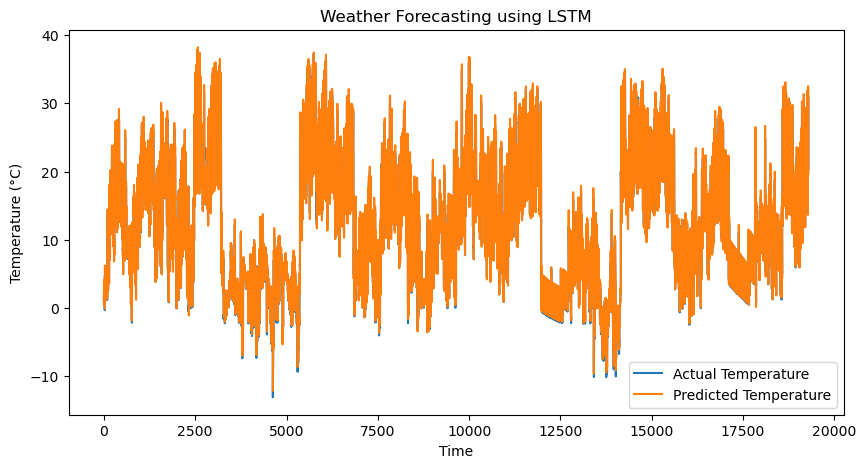

In [10]:
# Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.plot(actual_temp, label='Actual Temperature')
plt.plot(predicted_temp, label='Predicted Temperature')
plt.title('Weather Forecasting using LSTM')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()